# Лабораторна робота 6. Метод головних компонент. Метричні методи класифікації

Імопртуємо декілька власних довільних зображень, вклчаючи і власне фото

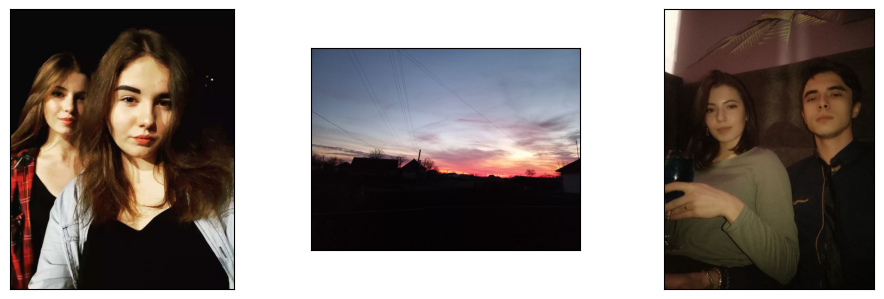

In [6]:
import matplotlib.pyplot as plt
import os

# Задайте шлях до вашої теки з зображеннями
image_dir = "images"

# Список файлів у вказаній директорії
image_files = os.listdir(image_dir)

# Виберіть перші n зображень зі списку
n_samples = 8
selected_images = image_files[:n_samples]

# Виведення зображень
plt.figure(figsize=(16, 8))
rows, cols = 2, 4
for i, image_file in enumerate(selected_images):
    plt.subplot(rows, cols, i + 1)
    # Зчитуємо та відображаємо зображення
    image_path = os.path.join(image_dir, image_file)
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.xticks(())
    plt.yticks(())

plt.show()


Перетворюємо заображення на зображення одного розміру та робимо їх сірими

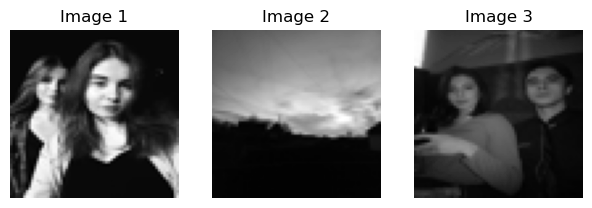

In [40]:
from PIL import Image
images = []
# Зміна розміру та конвертація кольору зображення перед додаванням до списку
for image_file in selected_images:
    image_path = os.path.join(image_dir, image_file)
    image = Image.open(image_path).convert('L')  # Конвертація в чорно-біле
    image = image.resize(image_shape)  # Зміна розміру
    images.append(np.array(image).flatten())
# Виведення перших кількох зображень
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i].reshape(image_shape), cmap='gray')
    plt.axis('off')  # Вимкнути відображення осей
    plt.title(f"Image {i+1}")

plt.show()


Стискаємо його в 20, 30, 50 разів, як показано в прикладах

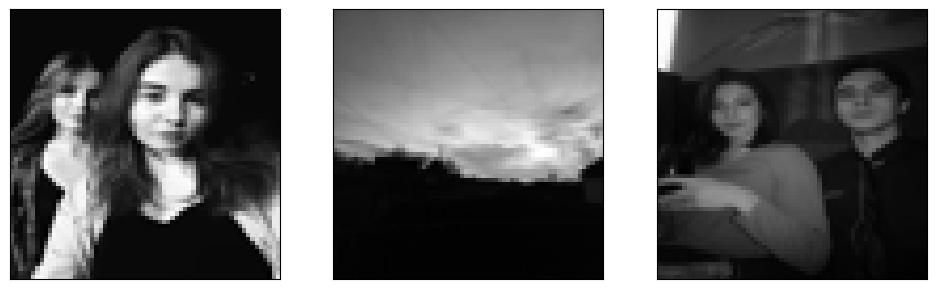

In [41]:
from sklearn.decomposition import PCA
image_shape = (64, 64)
base_size = image_shape[0] * image_shape[1]

def compress_and_show(compress_ratio):
    
    n_samples = 3  # Кількість зображень для відображення
    selected_images = image_files[:n_samples]
    global images
    images = np.array(images)
    
    # Створення моделі PCA та стискання зображень
    base_size = images.shape[1]
    model_pca = PCA(n_components=int(base_size * compress_ratio))
    model_pca.fit(images)
    images_compressed = model_pca.transform(images)
    
    # Відновлення зображень
    images_restored = model_pca.inverse_transform(images_compressed)
    images_restored = images_restored.reshape((-1, *image_shape))  # Повернення у формування зображень
    
    # Відображення стиснутих та відновлених зображень
    plt.figure(figsize=(16, 8))
    rows, cols = 2, 4
    for i in range(n_samples):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images_restored[i], interpolation='none', cmap='gray')
        plt.xticks(())
        plt.yticks(())

    plt.show()

compress_and_show(0.0005)


Будуємо kNN-класифікатор згідно з варіантом без використання віконних функцій і з використанням вікна Парзена. Аналізуємо результати.

Точність класифікації методом k найближчих сусідів: 0.90
Таблиця частот точності класифікації:
--------------------------------------------------
| Клас | Правильно класифіковано | Неправильно класифіковано |
--------------------------------------------------
|  -1  |             4             |              1               |
|  1  |             5             |              0               |
--------------------------------------------------


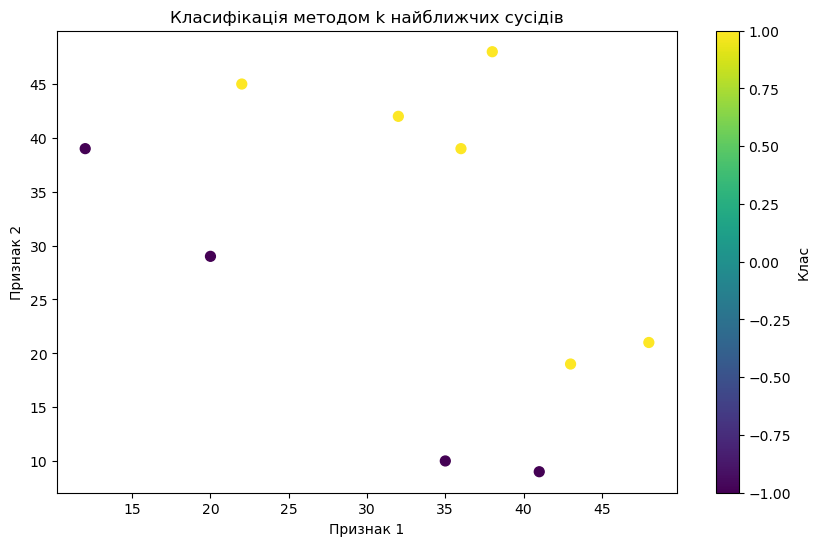

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Ваш варіант даних
x_train= np.array([[30, 21], [12, 24], [23, 29], [23, 38], [32, 37], [22, 34], [21, 47], [5, 43], [5, 47], [21, 24]])
y_train = np.array([-1,  1,  1, -1,  1,  1,  1,  1, -1, -1])
# Тестовий набір даних
x_test = np.array([[35, 10], [36, 39], [41, 9], [43, 19], [32, 42], [38, 48], [12, 39], [22, 45], [20, 29], [48, 21]])
y_test = np.array([-1, -1, -1, 1, 1, 1, -1, 1, -1, 1])

# Визначення класифікатора та навчання моделі
k = 3  # Кількість найближчих сусідів
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

# Прогнозування класів для тестових даних
y_pred = knn.predict(x_test)

# Оцінка точності класифікації
accuracy = accuracy_score(y_test, y_pred)
print(f"Точність класифікації методом k найближчих сусідів: {accuracy:.2f}")

# Вивід таблиці частот точності класифікації
print("Таблиця частот точності класифікації:")
print("--------------------------------------------------")
print("| Клас | Правильно класифіковано | Неправильно класифіковано |")
print("--------------------------------------------------")
for target in np.unique(y_test):
    correct = np.sum((y_test == target) & (y_pred_2 == target))
    incorrect = np.sum((y_test_2 == target) & (y_pred_2 != target))
    print(f"|  {target}  | {correct:^25} | {incorrect:^28} |")
print("--------------------------------------------------")

# Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(x_test_2[:, 0], x_test_2[:, 1], c=y_pred_2, cmap='viridis', s=50)
plt.title('Класифікація методом k найближчих сусідів')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.colorbar(label='Клас')
plt.show()

## Відповіді на контрольні питання

1. У чому полягає ідея методу головних компонент (PCA)?

Ідея методу головних компонент (PCA) полягає в тому, щоб знайти нові головні компоненти у просторі ознак таким чином, щоб максимізувати дисперсію даних, тобто зменшити розмірність даних, зберігаючи при цьому якомога більше інформації.

2. Яким чином метод головних компонент використовується для зменшення розмірності даних?

Використання PCA для зменшення розмірності даних полягає у трансформації оригінального набору даних в новий набір ознак, де кожна ознака є лінійною комбінацією оригінальних ознак. Потім можна відібрати перші к головних компонент, які зазвичай зберігають більшість дисперсії даних, щоб зменшити розмірність даних.

3. Як пов'язані PCA та SVD? Як його можна використовувати для аналізу даних?

Пов'язаність PCA та SVD: PCA використовує метод сингулярного розкладу (SVD) для обчислення головних компонент. У PCA використовуються власні вектори коваріаційної матриці даних, які можна отримати з розкладу SVD.

4. Які метрики якості використовуються в багатокласовій класифікації?

Метрики якості в багатокласовій класифікації включають точність (Accuracy), точність класу (Precision), повноту (Recall), F1-меру (F1-score) та матрицю помилок (Confusion Matrix).

5. Чим відрізняються стратегії one-vs-all та all-vs-all у багатокласовій класифікації?

Стратегії one-vs-all та all-vs-all у багатокласовій класифікації: У стратегії one-vs-all для кожного класу відокремлюється один клас від інших, тоді як у стратегії all-vs-all всі можливі пари класів розглядаються окремо.

6. Що таке гіпотеза компактності в метричних методах класифікації?

Гіпотеза компактності в метричних методах класифікації передбачає, що схожі дані зазвичай належать до одного класу.

7. Як працює метод k-найближчих сусідів (kNN)? Які його переваги та недоліки?

Метод k-найближчих сусідів (kNN): Для класифікації нового зразка kNN знаходить k найближчих зразків з навчального набору даних та призначає новому зразку клас, який найчастіше зустрічається серед цих сусідів.

8. У чому полягає суть методу парзенівського вікна? Які його недоліки та переваги?

Метод парзенівського вікна: Він використовується для вагової оцінки признаків в залежності від їх відстані до досліджуваного зразка. Недоліком є те, що він потребує великої кількості обчислень.

9. У чому полягає суть методу потенційних функцій у метричних методах класифікації? Які його недоліки та переваги

Метод потенційних функцій у метричних методах класифікації: Він використовується для перетворення простору ознак у простір вищої розмірності, де класи стають більш компактними.